In [68]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [69]:
data=pd.read_csv('ExempleFB.csv')

In [70]:
data.sample(10)

,Date,Close
72,3/8/2017,137.720001
55,2/10/2017,134.190002
18,12/16/2016,119.870003
176,8/4/2017,169.619995
153,7/3/2017,148.429993
237,10/31/2017,180.059998
97,4/12/2017,139.580002
247,11/14/2017,178.070007
90,4/3/2017,142.279999
143,6/19/2017,152.869995


In [71]:
data.shape

(251, 2)

In [72]:
data.describe()

,Close
count,251.000000
mean,149.933546
std,19.121419
min,115.050003
25%,135.400002
50%,150.289993
75%,169.385002
max,182.660004


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    251 non-null    object 
 1   Close   251 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.0+ KB


In [74]:
data['Date'].dtype

dtype('O')

In [75]:
data['Date']=pd.to_datetime(data['Date'])

<AxesSubplot:xlabel='Date'>

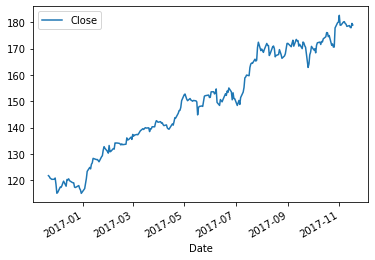

In [76]:
data.plot(x='Date',y='Close')

In [77]:
result = adfuller(data['Close'])
print('Statistiques ADF : {}'.format(result[0]))
print('p-value : {}'.format(result[1]))
print('Valeurs Critiques :')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

Statistiques ADF : -0.6096529570832039
p-value : 0.8687859019148874
Valeurs Critiques :
	1%: -3.456780859712
	5%: -2.8731715065600003
	10%: -2.572968544


La statistique ADF est loin des valeurs critiques et la p-value est supérieure au seuil (0,05). On peut donc conclure que la série temporelle n’est pas stationnaire.

In [78]:
data['Close'].shape

(251,)

In [79]:
data['Close']

0      121.769997
1      121.470001
2      120.839996
3      120.379997
4      120.410004
          ...    
246    178.770004
247    178.070007
248    177.949997
249    179.589996
250    179.000000
Name: Close, Length: 251, dtype: float64

In [80]:
data['Close'][0:250].shape

(250,)

In [81]:
y=data['Close']-data['Close'].shift(periods=1)

In [82]:
result = adfuller(y[1:])
print('Statistiques ADF : {}'.format(result[0]))
print('p-value : {}'.format(result[1]))
print('Valeurs Critiques :')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

Statistiques ADF : -16.2997516242461
p-value : 3.27526486995663e-29
Valeurs Critiques :
	1%: -3.4568881317725864
	5%: -2.8732185133016057
	10%: -2.5729936189738876


In [83]:
y=data['Close']-data['Close'].shift(periods=2)
result = adfuller(y[2:])
print('Statistiques ADF : {}'.format(result[0]))
print('p-value : {}'.format(result[1]))
print('Valeurs Critiques :')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

Statistiques ADF : -5.005790280375339
p-value : 2.1614943754351747e-05
Valeurs Critiques :
	1%: -3.4584868856997004
	5%: -2.873918902362675
	10%: -2.573367247623359


acf donne q.

pacf donne p.

d=1.Yt-Yt-1 stationnaire.

ACF

In [86]:
data['Close']

0      121.769997
1      121.470001
2      120.839996
3      120.379997
4      120.410004
          ...    
246    178.770004
247    178.070007
248    177.949997
249    179.589996
250    179.000000
Name: Close, Length: 251, dtype: float64

[1.         0.98745843 0.97474833 0.96241942 0.9499594  0.9377545
 0.92562581 0.91213315 0.89680002 0.88176474]


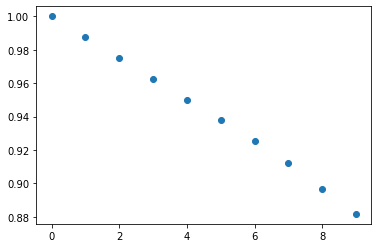

In [88]:
import statsmodels.api as sm
# Calculate the ACF
acf, confint = sm.tsa.acf(data['Close'].values, nlags=9, alpha=0.05)
print(acf)
plt.scatter(list(range(len(acf))),acf)

[ 1.          0.99140826 -0.01827669  0.01413112 -0.01665521  0.00732701
 -0.00463893 -0.08997207 -0.11994691  0.0051484 ]


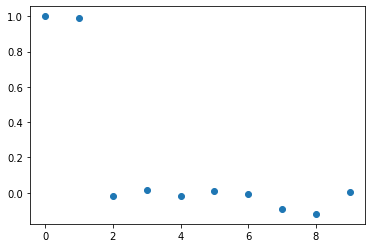

In [90]:
# Calculate the PACF
pacf, confint = sm.tsa.pacf(data['Close'].values, nlags=9, alpha=0.05)

print(pacf)
plt.scatter(list(range(len(pacf))),pacf)

In [91]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

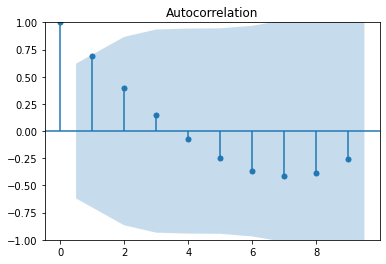

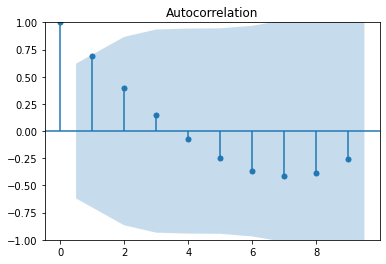

In [92]:
plot_acf(acf)

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


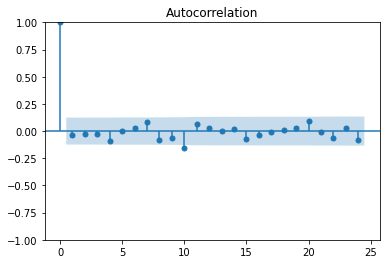

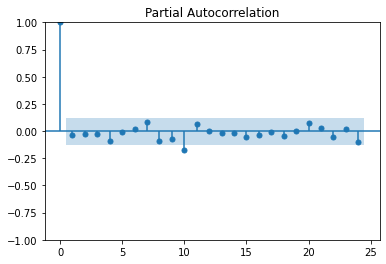

In [103]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf_original = plot_acf(df_train_diff)

pacf_original = plot_pacf(df_train_diff)

plt.show()

In [101]:
df_train_diff

1     -0.299996
2     -0.630005
3     -0.459999
4      0.030007
5      0.459999
         ...   
246    0.309997
247   -0.699997
248   -0.120010
249    1.639999
250   -0.589996
Name: Close, Length: 250, dtype: float64

<AxesSubplot:>

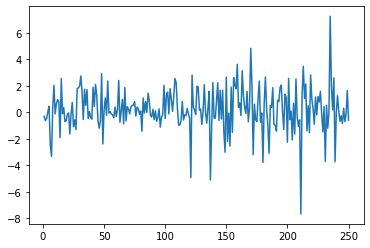

In [100]:
df_train_diff = data['Close'].diff().dropna()
df_train_diff.plot()

In [102]:
adf_test = adfuller(df_train_diff)
print(f'p-value: {adf_test[1]}')

p-value: 3.27526486995663e-29
